In [1]:
import numpy as np
import pandas as pd
import geopandas as gpd

import sompy
from sompy.visualization.mapview import View2D
import altair as alt

%matplotlib inline

CACHEDIR=C:\Users\hoek.HKV\.matplotlib
Using fontManager instance from C:\Users\hoek.HKV\.matplotlib\fontList.json
backend module://ipykernel.pylab.backend_inline version unknown
backend module://ipykernel.pylab.backend_inline version unknown
backend module://ipykernel.pylab.backend_inline version unknown


In [2]:
# load csv
file_name = r"D:\jupyter notebooks\0001.00 Markt\2018-11-15 casualties hittestres.csv"

In [3]:
# read all sheets from excel and parse as single dataframe
df = pd.read_csv(file_name, index_col=0)
df.head()

,delta_UN,delta_UG,delta_UX,delta_TN,delta_TG,delta_TX,delta_UN_SG9,delta_UG_SG9,delta_UX_SG9,delta_TN_SG9,delta_TG_SG9,delta_TX_SG9,delta_casualties
1995-01-01,-14.135714,-0.700000,2.664286,-0.048571,-0.882857,-1.474286,-10.022962,0.020550,2.056846,-2.965223,-3.409982,-3.738823,NaN
1995-01-08,-1.136905,2.339286,1.607143,-5.081548,-4.770833,-4.656548,-6.393306,0.272016,1.693983,-1.225375,-1.336648,-1.429390,NaN
1995-01-15,3.386905,4.077381,3.071429,-0.252381,0.152381,0.314881,-3.356450,0.596529,1.429973,0.047345,0.198730,0.289678,-227.291667
1995-01-22,-8.434524,-5.452381,-2.910714,2.634524,2.722619,3.062500,-0.761062,0.871014,1.241102,1.384977,1.640616,1.796185,-365.500000
1995-01-29,2.547619,1.619048,2.476190,3.391667,3.432143,3.376786,0.918831,0.882421,0.999072,2.235841,2.472333,2.581496,-298.333333


In [4]:
# drop rows containing a NaN value
df.dropna(axis=0, how='any', inplace=True) 

# make sure to only have quantitative data and get the numpy array
df = df.astype(np.float32)
X = df.values

In [5]:
# parameters of dataframe
df.columns

Index(['delta_UN', 'delta_UG', 'delta_UX', 'delta_TN', 'delta_TG', 'delta_TX',
       'delta_UN_SG9', 'delta_UG_SG9', 'delta_UX_SG9', 'delta_TN_SG9',
       'delta_TG_SG9', 'delta_TX_SG9', 'delta_casualties'],
      dtype='object')

#### documentation
- Tutorial regarding AirFlights (2018-10-14!) at https://github.com/sevamoo/SOMPY/blob/master/sompy/examples/AirFlights_hexagonal_grid.ipynb
- Detailed information regarding parameter settings in the docstring: https://github.com/sevamoo/SOMPY/blob/master/sompy/sompy.py#L55:L85

In [6]:
# train a kohonen network
mapsize = [50, 60]
som = sompy.SOMFactory.build(X, mapsize, mask=None, mapshape='planar', lattice='rect',
                             normalization='var', initialization='pca', neighborhood='gaussian',
                             training='batch', component_names=df.columns, name='sompy')

# verbose='debug' will print detailed information
som.train(n_job=1, verbose='debug')

 Training...
--------------------------------------------------------------
 details: 
      > data len is 1261 and data dimension is 13
      > map size is 50,60
      > array size in log10 scale is 7.691779693599581
      > number of jobs in parallel: 1
 -------------------------------------------------------------

 pca_linear_initialization took: 0.043000 seconds
 Rough training...
 radius_ini: 8.000000 , radius_final: 2.000000, trainlen: 72

 find_bmu took: 0.101000 seconds
 update_codebook_voronoi took: 0.025000 seconds
 epoch: 1 ---> elapsed time:  0.217000, quantization error: 1.841805

 find_bmu took: 0.208000 seconds
 update_codebook_voronoi took: 0.013000 seconds
 epoch: 2 ---> elapsed time:  0.304000, quantization error: 1.856882

 find_bmu took: 0.201000 seconds
 update_codebook_voronoi took: 0.014000 seconds
 epoch: 3 ---> elapsed time:  0.295000, quantization error: 1.883175

 find_bmu took: 0.141000 seconds
 update_codebook_voronoi took: 0.000000 seconds
 epoch: 4 ---> 

findfont: Matching :family=sans-serif:style=normal:variant=normal:weight=normal:stretch=normal:size=12.0 to DejaVu Sans ('c:\\python35\\lib\\site-packages\\matplotlib\\mpl-data\\fonts\\ttf\\DejaVuSans.ttf') with score of 0.050000
findfont: Matching :family=sans-serif:style=normal:variant=normal:weight=normal:stretch=normal:size=10.0 to DejaVu Sans ('c:\\python35\\lib\\site-packages\\matplotlib\\mpl-data\\fonts\\ttf\\DejaVuSans.ttf') with score of 0.050000


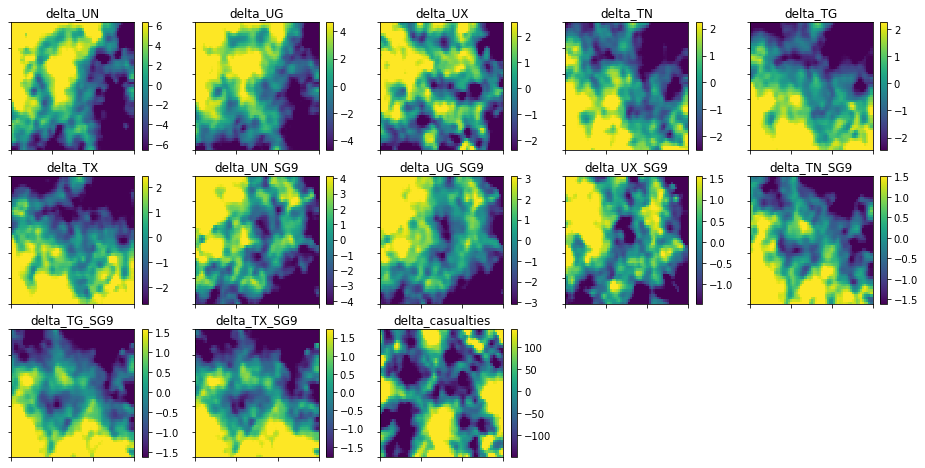

In [7]:
# show and save the planes
view2D = View2D(25, 25, "rand data", text_size=10)
view2D.show(som, col_sz=5, which_dim="all", denormalize=True)
view2D.save(r'D:\jupyter notebooks\0001.00 Markt/som_codebook.png')

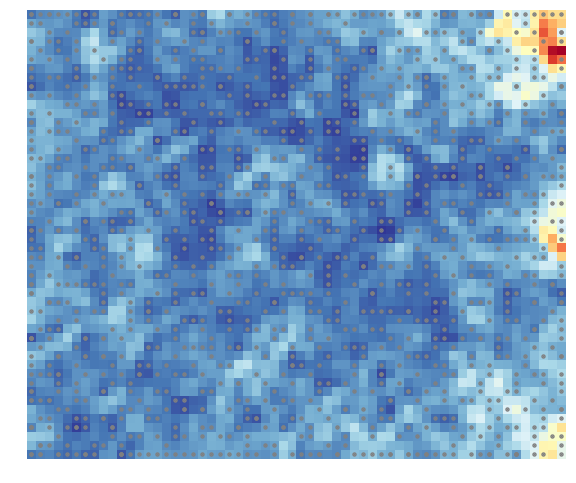

In [8]:
# compute the umatrix
u = sompy.umatrix.UMatrixView(
    50, 50, 'umatrix', show_axis=True, text_size=8, show_text=True)

# and its values
UMAT = u.build_u_matrix(som, distance=1, row_normalized=False)
UMAT2 = u.show(som, distance2=1, row_normalized=False,
               show_data=True, contooor=False, blob=False)#,
               #filename=r'D:\Projects\Pr\3537.30\2018-09-11 output//u_matrix_all_parameters.png')

In [9]:
# get the coordinates from the derived network (codebook)
codebook = som._normalizer.denormalize_by(som.data_raw, som.codebook.matrix)
msz = som.codebook.mapsize
cents = som.bmu_ind_to_xy(np.arange(0, msz[0] * msz[1]))

yv = cents[:, 0].astype(int)
xv = cents[:, 1].astype(int)
xyv = cents[:, 2].astype(int)  # coordinates

In [10]:
# combine the results from the kohonen network with the original data
df_cb = pd.DataFrame(
    data=codebook, columns=df.columns.str.replace('_', ' '))  # keywords)
df_cb['U-matrix'] = UMAT.flatten('C')
df_cb['X'] = xv
df_cb['Y'] = yv
df_cb['XY'] = xyv

In [11]:
df_cb.head()

,delta UN,delta UG,delta UX,delta TN,delta TG,delta TX,delta UN SG9,delta UG SG9,delta UX SG9,delta TN SG9,delta TG SG9,delta TX SG9,delta casualties,U-matrix,X,Y,XY
0,6.512618,8.197519,4.735575,-2.935579,-3.239156,-3.041687,6.069999,6.491259,4.224931,-0.258946,-0.354012,-0.363858,20.718385,0.365331,0,0,0
1,7.885153,9.211828,4.592352,-2.620379,-3.177906,-3.164154,6.427242,6.465421,3.807009,-0.204120,-0.481717,-0.555320,-57.581171,0.427690,1,0,1
2,9.986617,10.255237,4.173998,-2.099198,-3.086734,-3.480783,6.525632,6.579908,3.529701,-0.343439,-0.881466,-1.047899,-132.383923,0.438538,2,0,2
3,12.478279,10.879786,3.674786,-1.624637,-3.241739,-4.216087,6.556555,6.604190,3.262813,-0.473633,-1.280095,-1.633320,-166.013079,0.455516,3,0,3
4,14.521505,10.505555,3.372613,-1.305869,-3.303337,-4.776384,7.652915,6.132996,2.467181,-0.317313,-1.284880,-1.933616,-138.131832,0.466067,4,0,4


In [12]:
# combine computed key (node location in grid) to the original events
df['som_key'] = som._bmu[0].astype(int)

In [13]:
df.tail()

,delta_UN,delta_UG,delta_UX,delta_TN,delta_TG,delta_TX,delta_UN_SG9,delta_UG_SG9,delta_UX_SG9,delta_TN_SG9,delta_TG_SG9,delta_TX_SG9,delta_casualties,som_key
2018-09-30,-20.482143,-9.202381,0.517857,-5.900000,-2.725000,-0.145833,-12.800015,-7.394068,-2.034864,-0.474516,0.943592,2.404375,194.750000,2631
2018-10-07,-12.571428,-5.761905,-1.398810,-0.927976,0.045833,1.289881,-13.546975,-7.523781,-1.970656,-0.340566,1.138161,2.713468,263.500000,2632
2018-10-14,-18.988094,-10.565476,-3.559524,2.838691,4.472024,6.855357,-13.491961,-7.115705,-1.819120,-0.308526,1.114716,2.631392,192.041672,2993
2018-10-21,-11.505953,-3.589286,2.416667,-0.339881,1.600000,4.097024,-12.423624,-6.189579,-1.606102,-0.221770,1.024960,2.320056,157.875000,2570
2018-10-28,-5.761905,-4.291667,-3.470238,-0.291071,-0.151786,-0.848214,-9.604463,-4.621717,-1.321295,0.305231,1.196673,1.933981,42.333332,2623


In [14]:
# use absolute values of relative humidity and temperature regarding timeseries
df_U_T = pd.read_csv(r"D:\jupyter notebooks\0001.00 Markt\2018-11-16 temp humid.csv", index_col=0)
df_U_T = df_U_T[['UG','TG']]

In [15]:
# merge with df to get the som_key
df_U_T_key = pd.merge(df, df_U_T, left_index=True, right_index=True)[['UG', 'TG', 'som_key']]
df_U_T_key.columns = ['relative humidity (%)', 'temperature (C)', 'som_key']

In [16]:
df_U_T_key.head()

,relative humidity (%),temperature (C),som_key
1995-01-15,91.714286,4.514286,1156
1995-01-22,82.714286,6.114286,2713
1995-01-29,85.714286,6.442857,2102
1995-02-05,87.428571,5.985714,2103
1995-02-12,88.285714,6.242857,2043


In [17]:
# from the codebook only use the delta casualtues (mortality anomaly is a better word, rephrase)
df_MA_key = df_cb[['delta casualties', 'X', 'Y', 'XY']]
df_MA_key.columns = ['mortality_anomaly', 'X','Y','XY']

In [18]:
df_MA_key.head()

,mortality_anomaly,X,Y,XY
0,20.718385,0,0,0
1,-57.581171,1,0,1
2,-132.383923,2,0,2
3,-166.013079,3,0,3
4,-138.131832,4,0,4


In [19]:
# need custom values for legend min/max, figure out whats good
df_U_T_key['temperature (C)'].min()

-7.428571428571429

In [20]:
df_U_T_key['rh_low'] = 45
df_U_T_key['rh_high'] = 100
df_U_T_key['temp_low'] = -10
df_U_T_key['temp_high'] = 25

In [21]:
# use json as data_transformers in altair
# info: https://altair-viz.github.io/user_guide/data_transformers.html
alt.data_transformers.enable('json')

DataTransformerRegistry.enable('json')

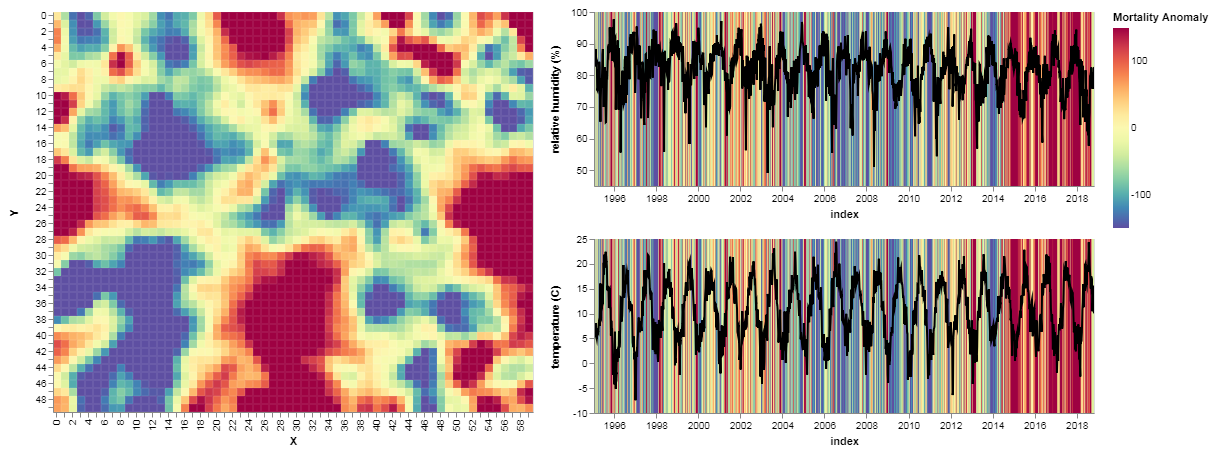

In [22]:
# combined super chart
brush = alt.selection(type='interval')

# prepare matrix chart
matrix = alt.Chart(df_MA_key).mark_rect().encode(
    x = alt.X('X:O', scale=alt.Scale(rangeStep=8, paddingInner=0.02)),
    y = alt.Y('Y:O', scale=alt.Scale(rangeStep=8, paddingInner=0.02)),
    opacity = alt.condition(brush, alt.value(1),  alt.value(0.2)),
    color = alt.Color('mortality_anomaly:Q', sort= "descending",
                      scale=alt.Scale(scheme="spectral", domain=[-150,150]), 
                      legend=alt.Legend(title='Mortality Anomaly'))                    
).add_selection(
    brush
)

# prepare base time-series chart (RH and T series)
ts_base = alt.Chart(df_U_T_key.reset_index()).mark_line().encode(
    x='index:T',
    color=alt.value('#000000')
).interactive(bind_y=False).properties(
    width=500,
    height=174
)

# prepare dynamic vertical rules, originate from matrix selection
ts_dynamic = alt.Chart(df_U_T_key.reset_index()).mark_rule().encode(
    x = 'index:T',
    color = alt.Color('MA:Q', sort= "descending",
                    scale=alt.Scale(scheme="spectral", domain=[-150,150])),
    size = alt.value(5)    
).transform_lookup(
    lookup = 'som_key',
    from_ = alt.LookupData(df_MA_key, 'XY'),
    as_ = 't_series'
).transform_calculate(
    "X", "datum.t_series.X"
).transform_calculate(
    "Y", "datum.t_series.Y"
).transform_calculate(
    "MA", "datum.t_series.mortality_anomaly"
).transform_filter(
    brush 
).interactive(bind_y=False).properties(
    width=500,
    height=174
)

# combine prepared charts
matrix | (
    (   ts_dynamic.encode(y=alt.Y('rh_low'), y2='rh_high') +
        ts_base.encode(y=alt.Y('relative humidity (%):Q', 
                               title='relative humidity (%)', 
                               scale=alt.Scale(zero=False)))
        
    ) & 
    (   ts_dynamic.encode(y='temp_low', y2='temp_high') +
        ts_base.encode(y=alt.Y('temperature (C):Q', 
                               title='temperature (C)'))
    )     
)

In [ ]:
comb.to_json()

In [23]:
# original visualisation was in >1000 lines of code in Vega
# can be reduced to ~200 lines of code in Vega-Lite
# and now reduced to 57 lines of code in Altair